In [1]:
#Nur did this, you're welcome <3
#Naman loves y'all ;)  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Creating mapping for each sheet in excel file
LIHTC_data = pd.ExcelFile("2018-LIHTC-Tenant-Tables.xlsx")

sheets = {}
for sheet_name in LIHTC_data.sheet_names:
    sheets[sheet_name] = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name=sheet_name)

## About the project:

The goal of this project is to create a tutorial for Data Science by performing essential DS pipeline steps on real data. We are using Affordable Housing data throughout the USA to show how the Data Science Pipeline can be used to attain useful information and make reasonable comparisions and conclusions. For example, we can find out what racial or age demographic inhibits these affordable apartments and use our historical knowledge to make reasonable assumption about these housing initiatives. This is also a tutorial of how evidence found in the data pipeline can be used conclusively, and our plan is to show that by cleaning, analysing and medling our Affordable housing data in this project.


## Phase 1&2: Data Collection and Management



In [2]:
pd.set_option('display.max_columns', None)
state_2018 = pd.read_excel("STATE_2018.xlsx")
state_2018 = state_2018.drop(['sub_program', 'entities', 'sumlevel', 'gsl', 'name', 'fedhse',
                              'cbsa', 'place', 'latitude', 'longitude', 'State', 'pha_total_units',
                              'months_since_report','pct_reported', 'pct_wage_major','pct_other_major',
                              'pct_lt50_median','pct_2adults','pct_1adult','pct_female_head',
                              'pct_female_head_child', 'pct_disabled_lt62','pct_disabled_ge62',
                              'pct_minority', 'pct_black_hsp','pct_wht_hsp','pct_oth_hsp',
                              'pct_multi','pct_median','months_waiting','months_from_movein',
                              'pct_bed1','pct_bed2','pct_bed3','pct_overhoused',
                              'tpoverty','tminority','tpct_ownsfd', 'pct_utility_allow',
                              'ave_util_allow', 'program', 'code', 'Quarter',
                              'ha_size'], axis=1)
state_2018 = state_2018[state_2018.program_label == 'Summary of All HUD Programs']
state_2018['States'] = state_2018['States'].str.slice(2)
state_2018.index = state_2018["States"].values
state_2018 = state_2018[state_2018.States != 'XX Missing']
state_2018 = state_2018.drop(columns=['States', 'program_label'])
state_2018 = state_2018.rename(columns={'total_units':'Total Units', 'pct_occupied':'Units Occupied (%)',
                           'number_reported':'Units Reported', 'people_total': 'Number of total Occupants',
                            'pct_movein':'% moved in less than 1 year', 'people_per_unit':'Occupancy/unit',
                            'rent_per_month':'Rent', 'spending_per_month':'Monthly Budget', 'hh_income':
                            'Household Income', 'person_income': 'Average Personal Income', 'pct_lt5k':
                            'Household Income %- (\$1-$5k)', 'pct_5k_lt10k': 'Household Income %- (\$5k-$10k)',
                            'pct_10k_lt15k': 'Household Income %- (\$10k-$15k)', 'pct_15k_lt20k':
                            'Household Income %- (\$15k-$20k)', 'pct_ge20k': 'Household Income %- (over \$20k)',
                            'pct_welfare_major':'% dependant on welfare', 'pct_lt30_median':
                            '% below 30% median wage', 'pct_disabled_all':'% of disabled occupants', 
                            'pct_lt24_head': 'Age of Household Head % - <24', 'pct_age25_50':
                            'Age of Household Head % -(25-50)', 'pct_age51_61': 'Age of Household Head % -(51-61)',
                            'pct_age62plus': 'Age of Household Head % -(62 plus)', 'pct_age85plus':
                            'Age of Household Head % -(85 plus)', 'pct_black_nonhsp': 'Occupants Race: Black',
                            'pct_native_american_nonhsp': 'Occupants Race: Native American',
                            'pct_asian_pacific_nonhsp': 'Occupants Race: Asian', 'pct_white_nothsp':
                            'Occupants Race: White', 'pct_hispanic': 'Occupants Race: Hispanic',})
state_2018

,Total Units,Units Occupied (%),Units Reported,% moved in less than 1 year,Occupancy/unit,Number of total Occupants,Rent,Monthly Budget,Household Income,Average Personal Income,Household Income %- (\$1-$5k),Household Income %- (\$5k-$10k),Household Income %- (\$10k-$15k),Household Income %- (\$15k-$20k),Household Income %- (over \$20k),% dependant on welfare,% below 30% median wage,% of disabled occupants,Age of Household Head % - <24,Age of Household Head % -(25-50),Age of Household Head % -(51-61),Age of Household Head % -(62 plus),Age of Household Head % -(85 plus),Occupants Race: Black,Occupants Race: Native American,Occupants Race: Asian,Occupants Race: White,Occupants Race: Hispanic
Alabama,91524,91,83571,16,2.2,181896,273,547,12063,5542,15,34,23,14,14,2,69,17,7,51,17,25,2,73,0,0,25,1
Alaska,7783,101,7740,16,2.1,16618,529,649,20491,9544,7,6,23,28,35,6,72,22,3,44,22,31,2,14,22,12,45,7
Arizona,41000,92,39000,11,2.3,89373,313,629,12817,5593,12,34,23,13,18,1,71,19,2,41,20,37,3,22,3,2,35,36
Arkansas,50521,90,45192,22,2.0,88799,272,448,11717,5963,12,37,26,14,11,1,64,24,8,43,20,29,2,51,0,0,45,2
California,491113,90,451733,7,2.1,945541,444,1040,17182,8209,5,10,43,16,26,8,78,24,1,32,20,46,7,28,1,16,27,28
Colorado,61820,91,56039,12,2.0,112509,335,737,13691,6819,9,33,24,15,19,5,81,25,3,39,21,37,3,19,1,2,45,29
Connecticut,82830,92,76242,8,2.0,152497,390,1222,16090,8044,7,28,20,15,28,3,81,21,2,40,20,38,5,30,0,1,28,39
Delaware,13030,91,11952,10,2.1,24849,350,718,14702,7072,9,26,24,17,24,3,75,19,6,42,19,34,3,68,0,1,22,7
District of Columbia,34477,83,28185,5,2.1,58427,364,1215,15257,7360,9,34,18,11,28,8,85,19,2,40,24,34,3,90,0,2,1,4
Florida,195822,92,184375,9,2.2,407463,343,744,13618,6162,10,36,21,13,19,1,73,21,3,41,17,39,4,52,0,1,17,29


In [3]:
##Dropping columns 
sheets["Table 4"] = sheets["Table 4"].drop(columns="Unnamed: 10")

##Renaming cols to match actual dataset
sheets["Table 4"].iloc[0, 0] = sheets["Table 4"].iloc[1, 0]
sheets["Table 4"].iloc[0, 2:8] = sheets["Table 4"].iloc[1, 2:8]
sheets["Table 4"].iloc[0, 9] = sheets["Table 4"].iloc[1, 9]
sheets["Table 4"].columns = sheets["Table 4"].iloc[0]

##Dropping rows that are irrelevant
sheets["Table 4"] = sheets["Table 4"].drop(sheets["Table 4"].index[57:81])
sheets["Table 4"] = sheets["Table 4"].drop([0,1])
##Getting rid of footnote
sheets["Table 4"] = sheets["Table 4"].replace(to_replace = "New York1", value = "New York")

##Renaming indices
sheets["Table 4"].index = sheets["Table 4"].State.values

##Removing extra whitespaces from column names
sheets["Table 4"].columns = sheets["Table 4"].columns.str.replace('\s{2,}',' ', regex=True)

sheets["Table 4"]

,State,Properties Reported (%),White Alone (%),Black or African American Alone (%),Asian Alone (%),American Indian and Alaska Native Alone (%),Native Hawaiian and Other Pacific Islander Alone (%),Other (including Multiple Race) (%),Hispanic (Any Race) (%),Race or Ethnicity Not Reported (%)
Alabama,Alabama,86.36364,34.45933,63.74529,0.30981,0.20529,0.10451,0.80624,0.35086,0.01866
Alaska,Alaska,100.00000,52.25753,6.68896,4.18060,18.22743,2.17391,0.25084,4.34783,11.87291
Arizona,Arizona,94.71154,35.68655,13.70379,1.21932,7.16837,0.29124,2.15129,33.10811,6.67133
Arkansas,Arkansas,98.32869,42.98514,43.62179,0.37727,0.25937,10.98797,0.56590,1.20255,0.00000
California,California,81.15494,24.97301,18.02942,0.00000,0.84126,0.00000,3.44880,38.61794,14.08958
Colorado,Colorado,84.25605,35.71180,11.20104,1.28039,0.70817,0.11065,3.39224,21.33350,26.26221
Connecticut,Connecticut,91.57895,30.98213,27.23370,0.01745,0.52352,0.00000,1.83582,29.51277,9.89460
Delaware,Delaware,98.42520,24.79282,65.19337,0.69061,0.63536,0.15193,0.95304,7.56906,0.01381
District of Columbia,District of Columbia,71.96262,2.46130,80.92712,0.34789,0.18264,0.07827,0.97408,6.07932,8.94938
Florida,Florida,92.34194,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000


In [4]:
##Drop cols 
# sheets["Table 7"] = sheets["Table 7"].drop(columns = ["Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])

##Renaming cols to match actual dataset
sheets["Table 7"].iloc[0, 0] = sheets["Table 7"].iloc[1, 0]
sheets["Table 7"].iloc[0, 2:4] = sheets["Table 7"].iloc[1, 2:4]
sheets["Table 7"].columns = sheets["Table 7"].iloc[0]

##Dropping rows that are irrelevant
sheets["Table 7"] = sheets["Table 7"].drop(sheets["Table 7"].index[57:66])
sheets["Table 7"] = sheets["Table 7"].drop([0,1])
##Getting rid of footnote
sheets["Table 7"] = sheets["Table 7"].replace(to_replace = "New York2", value = "New York")

##Replacing missing values w/ nan
sheets["Table 7"] = sheets["Table 7"].replace(to_replace = "Data Not Reported", value = np.nan) 

##Renaming indices
sheets["Table 7"].index = sheets["Table 7"].State.values
sheets["Table 7"]

##Removing extra whitespaces from column names
sheets["Table 7"].columns = sheets["Table 7"].columns.str.replace('\s{2,}',' ', regex=True)

##Getting rid of footname in column name
sheets["Table 7"] = sheets["Table 7"].rename(columns={"All Household Members Reported1 (% of Households)": "All Household Members Reported (% of Households)"})

sheets["Table 7"]

,State,All Household Members Reported (% of Households),Head of Household (%),All Reported Members (%),At Least One Member < 18 (%),At Least One Member >= 62 (%),Reported Head of Household >= 62 (%)
Alabama,Alabama,92.45592,99.98210,99.90904,37.55631,31.21141,30.64165
Alaska,Alaska,77.47126,99.15709,99.06250,33.40996,33.10345,32.33716
Arizona,Arizona,99.37811,99.95966,99.81042,45.06522,31.83071,30.57348
Arkansas,Arkansas,99.98844,99.69946,99.59094,36.29638,31.19870,30.71321
California,California,95.26921,99.78389,99.78015,36.73368,41.57440,39.76464
Colorado,Colorado,99.51023,99.67349,99.68896,35.53325,31.35287,30.42955
Connecticut,Connecticut,96.24147,96.67155,97.91855,29.43248,41.41241,40.38396
Delaware,Delaware,100.00000,99.98622,94.60915,39.23649,30.89857,30.44377
District of Columbia,District of Columbia,69.09379,96.33291,97.05082,27.45039,25.42821,24.74911
Florida,Florida,10.17116,NaN,NaN,NaN,NaN,NaN


In [5]:
# Reading in table 2.
disabilities_df = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name="Table 6")

## Parsing data from excel file

# Retrieving row names from first row and removing whitespace.
col_names = disabilities_df.iloc[0, 1:].str.replace(r'\s{2,}', '', regex=True).values
# Retrieving states from first column to use as indexes.
states = disabilities_df.iloc[2:57, 0].values
# Removing extra rows and columns.
disabilities_df = disabilities_df.iloc[2:57, 1:]

disabilities_df.columns = col_names
disabilities_df.index = states

disabilities_df

,Properties Reported(%),All Household Members Reported1(% of Households),Disability Statusis Reported(% of Individuals),Reported as Disabled(% of Individuals)
Alabama,86.3636,92.4559,99.992,2.8581
Alaska,100,77.4713,78.1641,6.75781
Arizona,94.7115,99.3781,100,5.20868
Arkansas,98.3287,99.9884,100,0
California,81.1549,95.2692,93.8151,6.296
Colorado,84.2561,99.5102,100,3.17314
Connecticut,91.579,96.2415,96.1977,11.1199
Delaware,98.4252,100,100,3.79609
District of Columbia,71.9626,69.0938,61.2394,2.86141
Florida,92.3419,10.1712,0,0


In [6]:
# Drop the the irrelevant rows and columns
sheets["Table 8"] = sheets["Table 8"].drop(columns=['Unnamed: 9'])
sheets["Table 8"] = sheets["Table 8"].drop([57,58,59,60,61])

# Get the correct headers
sheets["Table 8"].iloc[0, 0] = sheets["Table 8"].iloc[1, 0]
sheets["Table 8"].iloc[0, 3:9] = sheets["Table 8"].iloc[1, 3:9]

# Replace '$' with '\$' so that it would not be recognized as inline math
for i in range(5, 8):
    sheets["Table 8"].iloc[0][i] = sheets["Table 8"].iloc[0][i].replace('$', '\$')

# Set the new headers
sheets["Table 8"].columns = sheets["Table 8"].iloc[0]

# Clean up
sheets["Table 8"] = sheets["Table 8"].iloc[2:]
sheets["Table 8"] = sheets["Table 8"].replace('New York1','New York')
sheets["Table 8"] = sheets["Table 8"].replace(to_replace = "Data Not Reported", value = np.nan)
sheets["Table 8"].columns = sheets["Table 8"].columns.str.replace('\s{2,}',' ', regex=True)

# Set the state names to be the indices 
sheets["Table 8"].index = sheets["Table 8"].iloc[:58, 0].values
sheets["Table 8"] = sheets["Table 8"].drop(columns=['State'])
sheets["Table 8"]

,Properties Reported (%),Income Reported (%),Median Income ($),"<= $5,000 (%)","\$5,001 to \$10,000 (%)","\$10,001 to \$15,000 (%)","\$15,001 to \$20,000 (%)","> $20,000 (%)"
Alabama,86.36364,96.42633,16380.0,5.70456,18.78422,20.12993,20.35576,35.02552
Alaska,100.00000,78.39081,21487.0,3.81232,2.93255,14.07625,25.31769,53.86119
Arizona,94.71154,98.28224,18912.0,6.59438,15.63772,15.58299,14.57742,47.60748
Arkansas,98.32869,99.04057,13068.0,10.64426,25.53688,22.01214,16.69001,25.11671
California,81.15494,93.76841,20764.0,2.95568,5.23305,26.53737,13.63478,51.63913
Colorado,84.25605,97.77064,22581.0,4.45637,14.42297,12.85996,11.86357,56.39713
Connecticut,91.57895,97.08293,18696.0,3.80726,20.75696,15.81972,12.22433,47.39174
Delaware,98.42520,99.24201,19476.0,5.98528,14.20636,16.21997,15.26177,48.32662
District of Columbia,71.96262,92.34890,24324.0,8.89779,16.85595,9.62497,7.23915,57.38214
Florida,92.34194,7.44615,24075.0,2.32641,8.81353,10.08411,13.75268,65.02326


In [7]:
# Drop the the irrelevant rows
sheets["Table 12"] = sheets["Table 12"].drop([57,58,59,60,61])

# Get the correct headers
sheets["Table 12"].iloc[0, 0] = sheets["Table 12"].iloc[1, 0]
sheets["Table 12"].iloc[0, 4:13] = sheets["Table 12"].iloc[1, 4:13]

# Set the new headers
sheets["Table 12"].columns = sheets["Table 12"].iloc[0]

# Clean up
sheets["Table 12"] = sheets["Table 12"].iloc[2:]
sheets["Table 12"] = sheets["Table 12"].replace('New York1','New York')
sheets["Table 12"] = sheets["Table 12"].replace(to_replace = "Data Not Reported", value = np.nan)
sheets["Table 12"].columns = sheets["Table 12"].columns.str.replace('\s{2,}',' ', regex=True)

# Set the state names to be the indices 
sheets["Table 12"].index = sheets["Table 12"].iloc[:58, 0].values
sheets["Table 12"] = sheets["Table 12"].drop(columns=['State'])
sheets["Table 12"] = sheets["Table 12"].iloc[:-2, :]
sheets["Table 12"]

,Reported Amount of Federal Rental Assistance > $0 (%),Source of Federal Rental Assistance Reported (%),Source of Federal Rental Assistance,HUD Section 8 Moderate Rehabilitation (%),Public Housing Operating Subsidy (%),HOME Rental Assistance (%),"HUD Housing Choice Voucher (HCV), Tenant-Based (%)",HUD Project-Based Voucher (PBV) (%),USDA Section 521 Rental Assistance Program (%),Other Federal Rental Assistance (%),Not Reported (%),Total (%)
Alabama,38.64736,38.64736,13.59965,0.00000,0.00000,0.00728,19.34076,0.00000,18.66405,48.38827,0.0,100.00001
Alaska,36.41577,34.98208,1.63934,12.90984,0.20492,0.00000,14.54918,17.82787,52.86885,0.00000,0.0,100.00000
Arizona,12.08103,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,20.89051,20.44245,6.74658,0.78767,0.13699,0.06849,12.97945,35.00000,38.93836,5.34247,0.0,100.00001
California,37.99137,35.89672,21.51056,3.55344,0.83879,0.96447,29.59122,31.48384,8.99392,3.06376,0.0,100.00001
Colorado,8.66158,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,60.25954,50.51456,27.32704,0.95591,1.64894,0.11351,17.06894,42.53196,1.78038,8.57331,0.0,99.99999
Delaware,18.44132,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District of Columbia,13.91698,13.85787,29.09953,0.00000,0.00000,0.00000,8.24645,62.60663,0.00000,0.04739,0.0,100.00000
Florida,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Phase 3: Data Analysis


Text(0.5, 1.0, 'Total Affordable units and their Occupancies for every State')

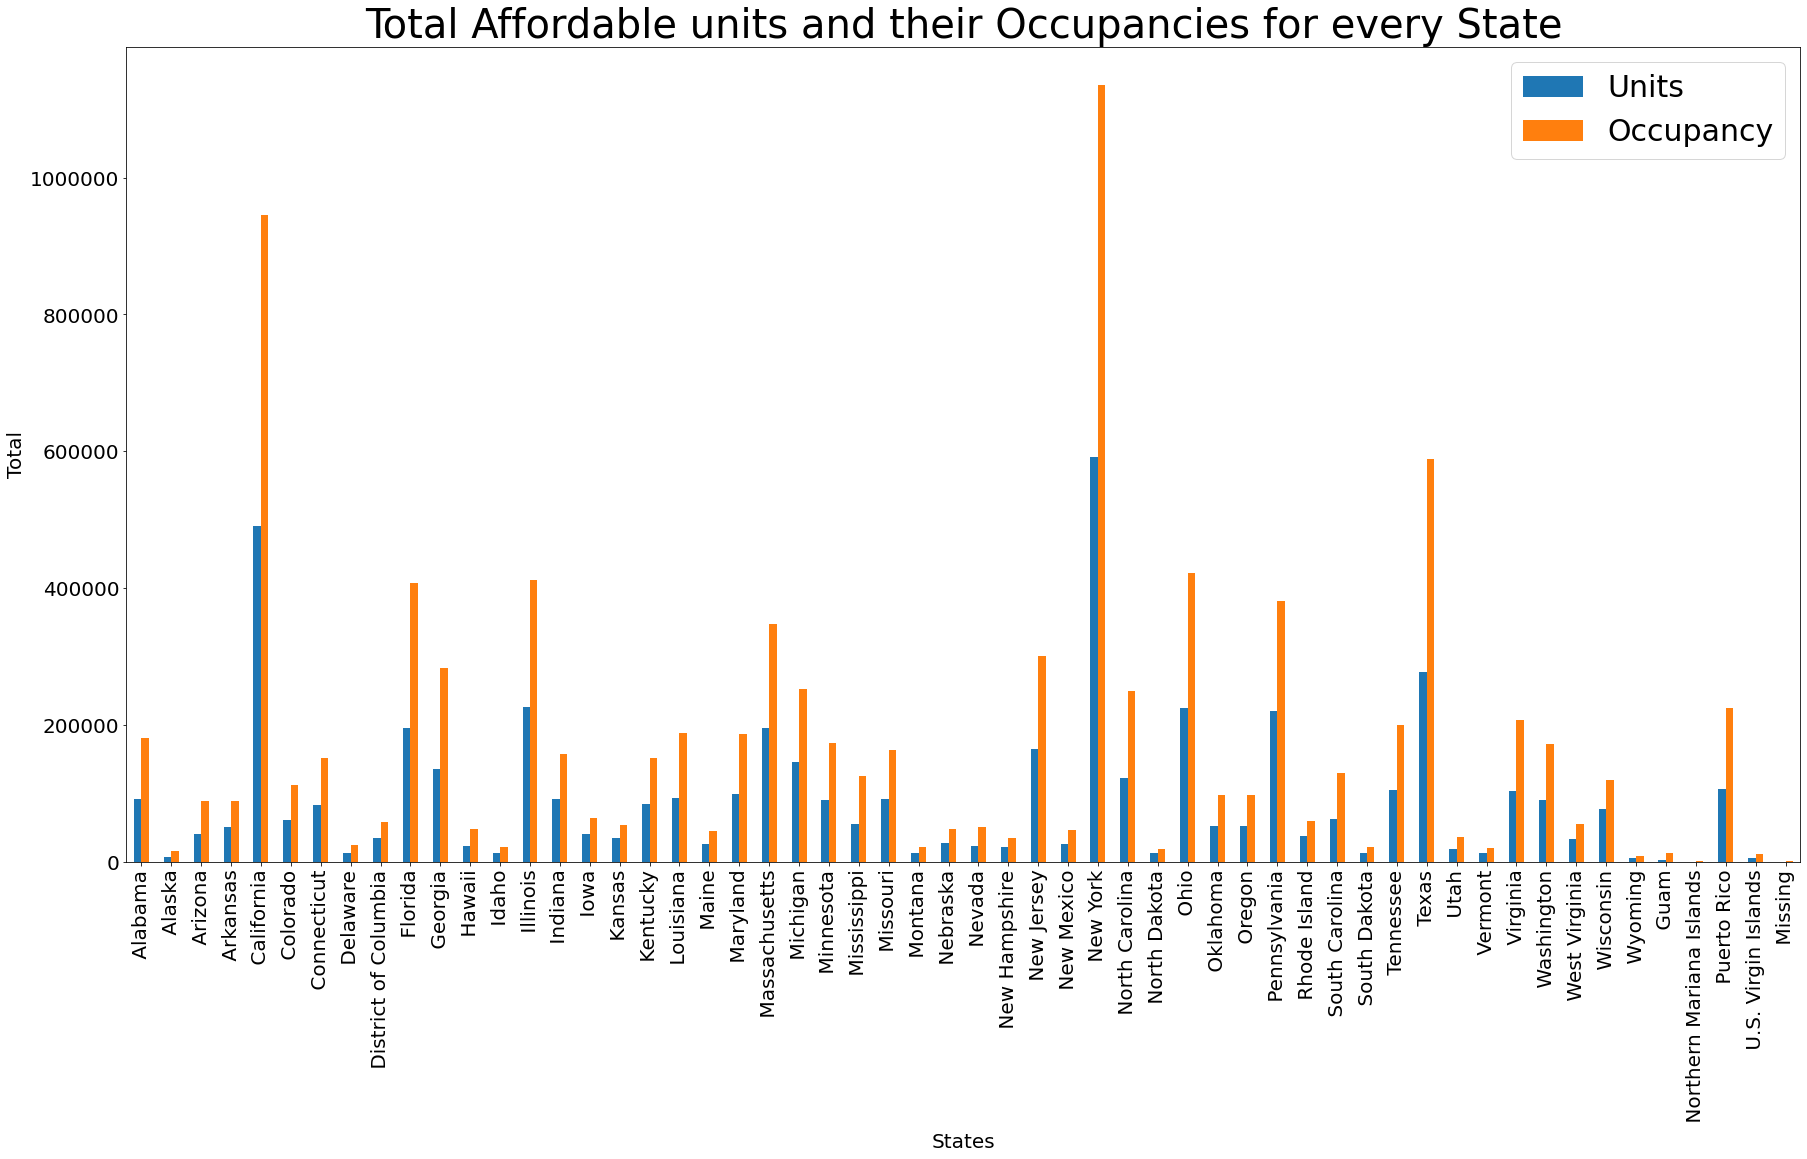

In [8]:

df = pd.DataFrame({'Units': state_2018['Total Units'].values,
                  'Occupancy': state_2018['Number of total Occupants'].values
                  }, index=state_2018.index)

ax = df.plot.bar( figsize=(30, 15))
plt.xlabel('States', fontsize=20)
plt.ylabel('Total', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend( prop={'size': 30})
from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_minor_formatter(NullFormatter())
plt.title('Total Affordable units and their Occupancies for every State', fontsize=40)

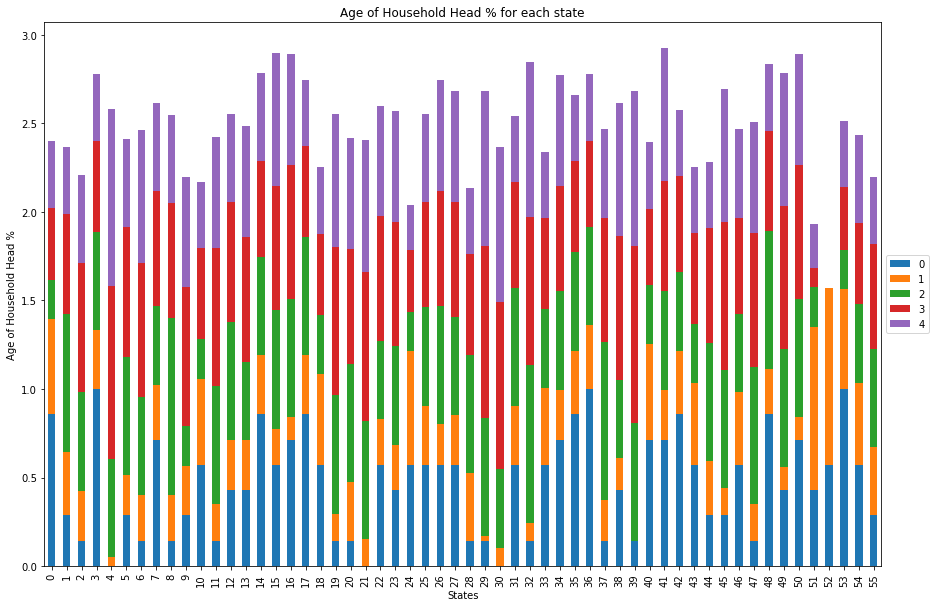

In [9]:
##Creating a new dataframe for plotting
household_age = state_2018[["Age of Household Head % - <24", "Age of Household Head % -(25-50)", "Age of Household Head % -(51-61)", "Age of Household Head % -(62 plus)", "Age of Household Head % -(85 plus)"]]

# ##Normalize form: (X-X_min)/(X_max - X_min)
# household_age = (household_age - household_age.min())/(household_age.max() - household_age.min())
from sklearn import preprocessing

x = household_age.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
household_age = pd.DataFrame(x_scaled)


# ##Resorting cols 
# household_age = household_age[["Age of Household Head % - <24", "Age of Household Head % -(25-50)", "Age of Household Head % -(51-61)", "Age of Household Head % -(62 plus)", "Age of Household Head % -(85 plus)"]]

##Plotting
household_age.plot.bar(stacked=True, xlabel="States", ylabel="Age of Household Head %", figsize=(15, 10), title= "Age of Household Head % for each state")

##Moving legend outside for easier reading
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

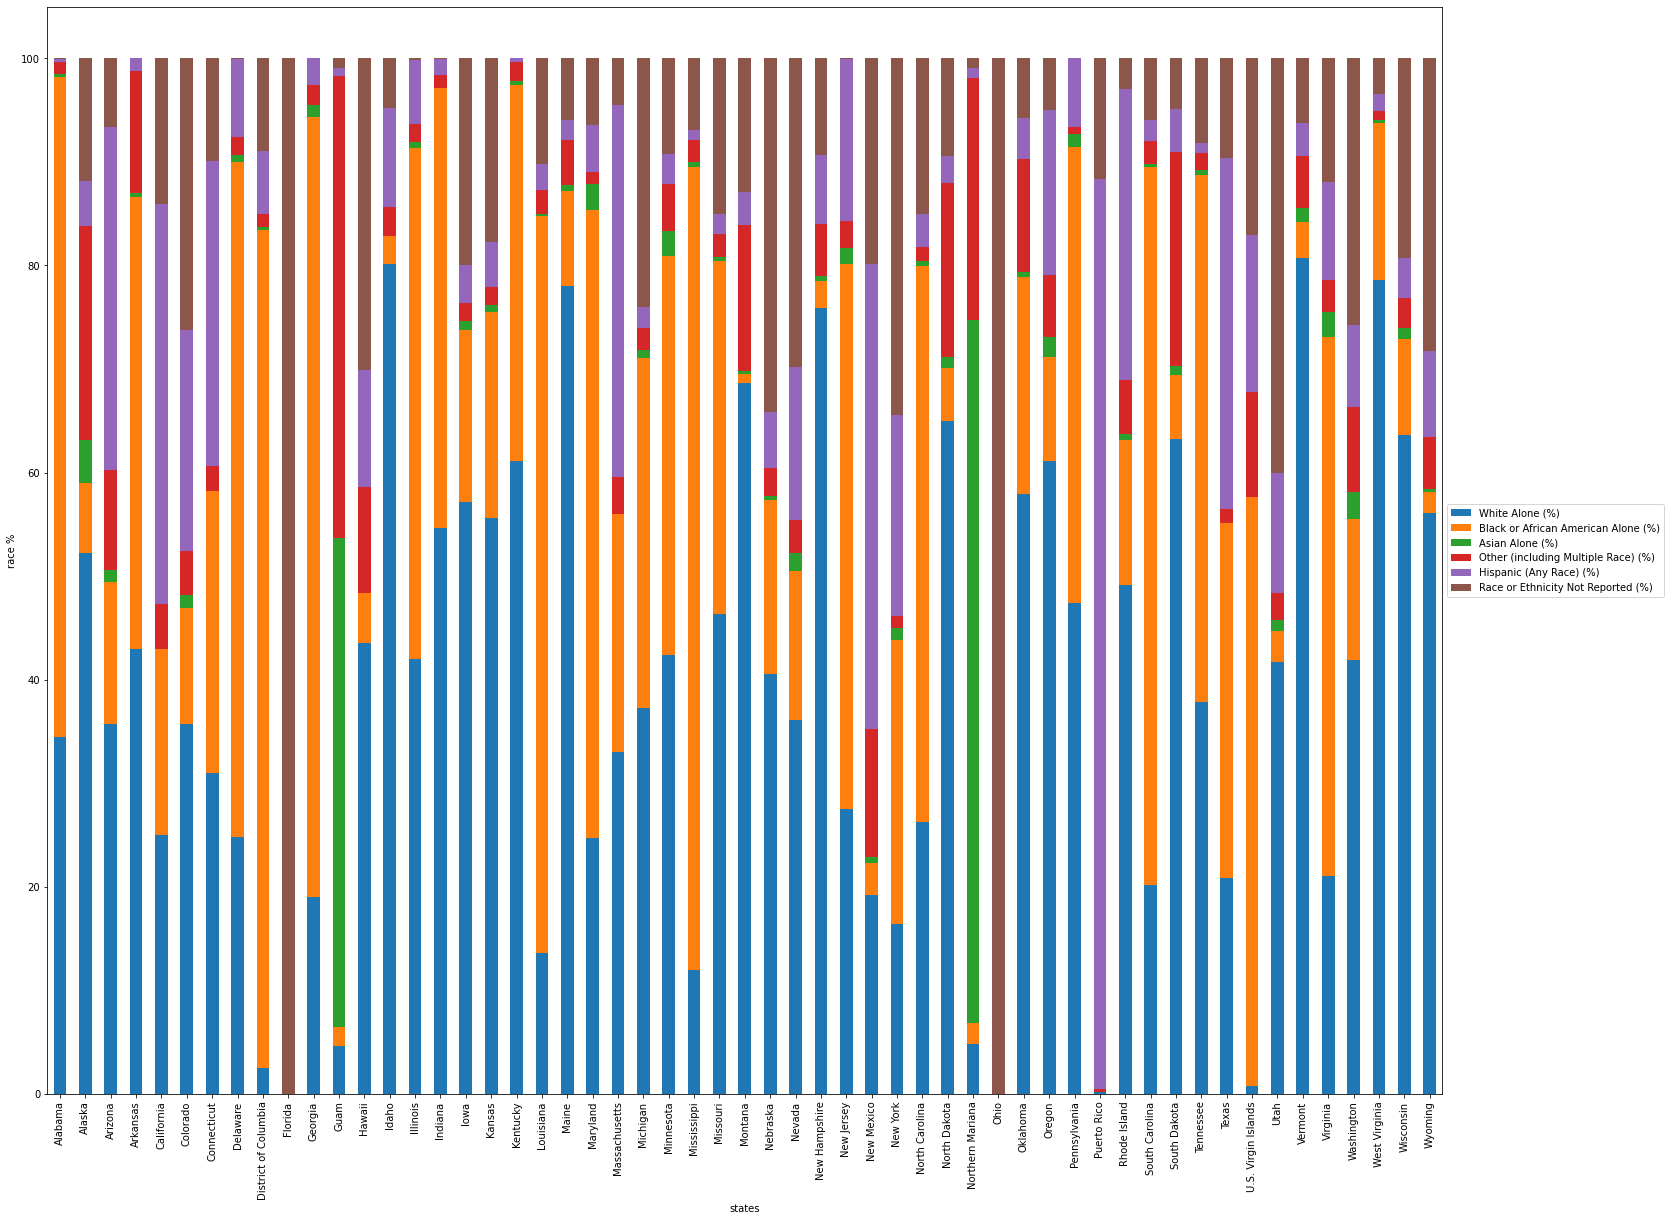

In [10]:
##Creating a new dataframe for plotting
race_data_per_state = sheets["Table 4"]

##Put American Indian & Alaska Native Alone and Native Hawaiian and Other Pacific Islander Alone (%) together w/ Other catergory
race_data_per_state["Other (including Multiple Race) (%)"] = sheets["Table 4"]["American Indian and Alaska Native Alone (%)"] +sheets["Table 4"]["Native Hawaiian and Other Pacific Islander Alone (%)"] + sheets["Table 4"]["Other (including Multiple Race) (%)"]

##Dropping cols that aren't relevant
race_data_per_state = race_data_per_state.drop(columns = ["Properties Reported (%)", "American Indian and Alaska Native Alone (%)", "Native Hawaiian and Other Pacific Islander Alone (%)"])

##Plotting
race_data_per_state.plot.bar(stacked=True, xlabel="states", ylabel="race %", figsize=(25, 20), title= "Race % for each state")
plt.title('', fontsize=30)
##Moving legend outside of plot for easier viewing
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


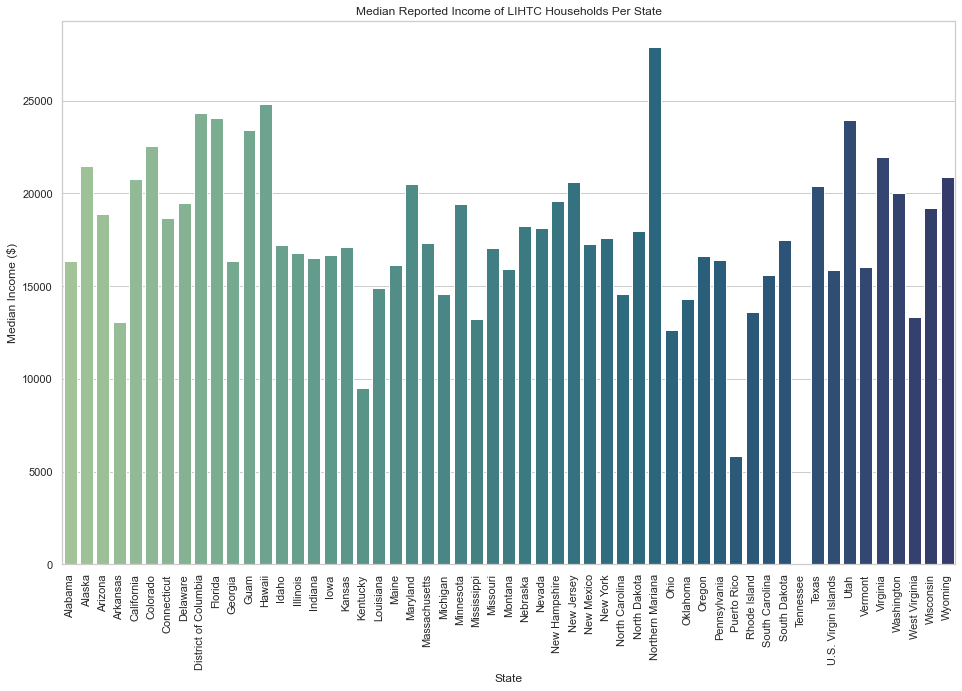

<AxesSubplot:title={'center':'Distribution of Income of LIHTC Households Per State'}, xlabel='State', ylabel='Percentage'>

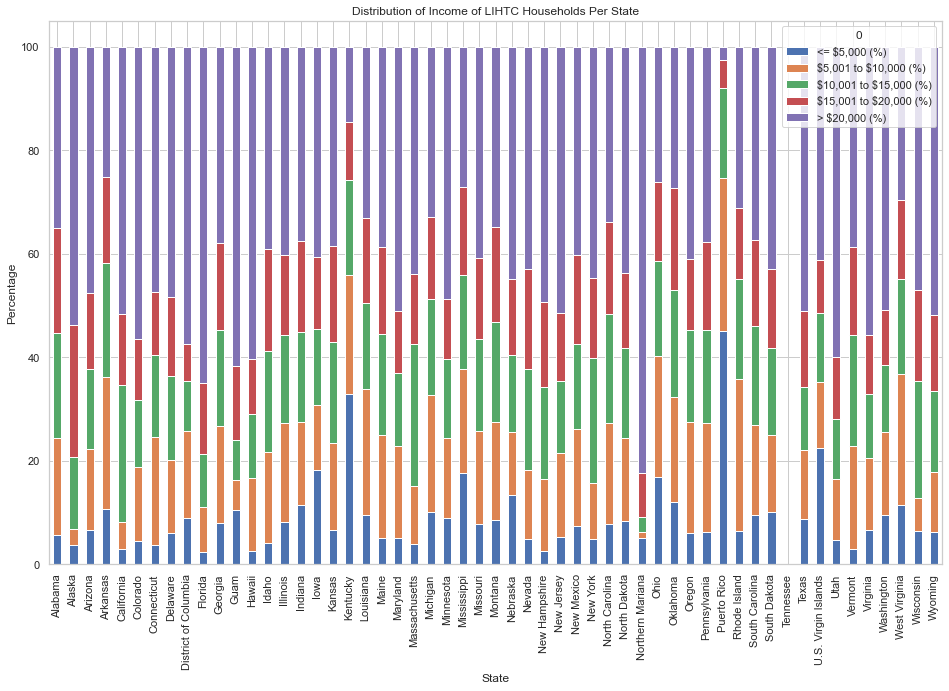

In [11]:
# Set the figure size
plt.figure(figsize=(16,10))

# Set the figure style
sns.set_theme(style='whitegrid')

median_income_by_state = sns.barplot(y='Median Income ($)', x= sheets['Table 8'].index, data = sheets['Table 8'], palette=sns.color_palette("crest", sheets["Table 8"].index.size))
median_income_by_state.set_xticklabels(median_income_by_state.get_xticklabels(), rotation=90)

# Set the x- and y-axis labels and title
plt.xlabel('State')
plt.ylabel('Median Income ($)')
plt.title('Median Reported Income of LIHTC Households Per State')
plt.show()
distribution_of_income = pd.DataFrame(sheets["Table 8"][['<= $5,000 (%)', '\$5,001 to \$10,000 (%)', '\$10,001 to \$15,000 (%)','\$15,001 to \$20,000 (%)', '> $20,000 (%)']])
distribution_of_income.plot.bar(figsize=(16,10), stacked=True, xlabel='State', ylabel='Percentage', title='Distribution of Income of LIHTC Households Per State')


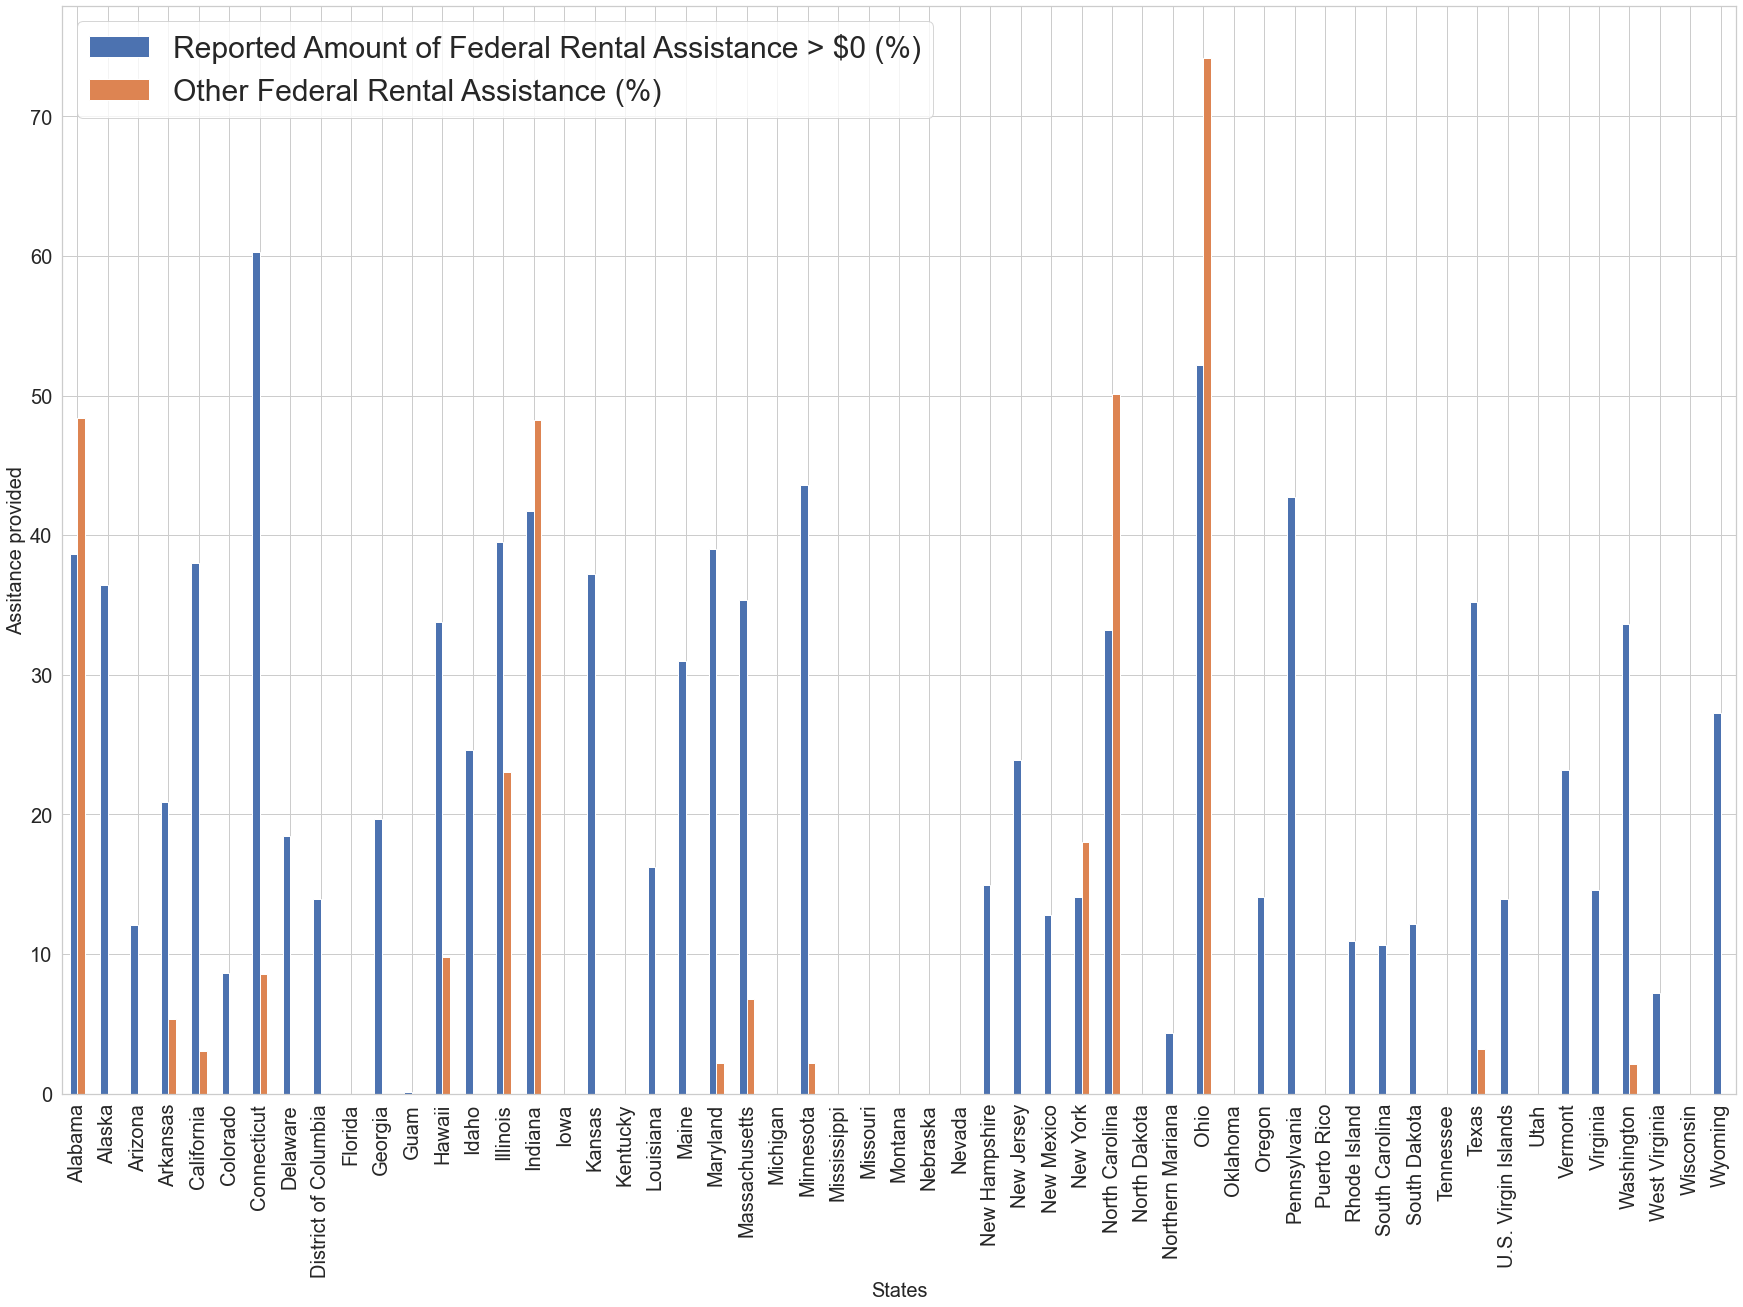

In [12]:
federal_asst_df = sheets["Table 12"]
cols = [federal_asst_df.columns[0], federal_asst_df.columns[9]]
ax = federal_asst_df.plot.bar(y=cols, figsize=(30,20))
plt.xlabel('States', fontsize=20)
plt.ylabel('Assitance provided', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(prop={'size': 30})
plt.show()